<a href="https://colab.research.google.com/github/Kim-matthew-0422/anomalydetectionpyspark/blob/main/nab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!kaggle datasets download -d boltzmannbrain/nab

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

sample_data


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"etkim422","key":"80ab2ded6fd7d42e4f1a1492a557fa36"}'}

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d boltzmannbrain/nab

  0% 0.00/1.64M [00:00<?, ?B/s]
100% 1.64M/1.64M [00:00<00:00, 146MB/s]


In [ ]:
!ls

kaggle.json  nab.zip  sample_data


In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2023-03-14 08:12:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-14 08:12:53 (61.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [8]:
unzip_data('nab.zip')

In [ ]:
!ls

artificialNoAnomaly    nab.zip	       realAWSCloudwatch  sample_data
artificialWithAnomaly  __pycache__     realKnownCause
helper_functions.py    README.md       realTraffic
kaggle.json	       realAdExchange  realTweets


In [9]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [10]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [11]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=39816e1d636958715e5ffd0301cc0c809d91c7d1ba94d97484159189c8ba3182
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [12]:
import pyspark
import pandas as pd

In [13]:
from pyspark.sql import SparkSession

In [14]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

In [15]:
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [16]:
!pip install -q findspark

In [17]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName("Test Setup")\
        .getOrCreate()

In [18]:
!ls

artificialNoAnomaly    __pycache__	  realTraffic
artificialWithAnomaly  README.md	  realTweets
helper_functions.py    realAdExchange	  sample_data
kaggle.json	       realAWSCloudwatch  spark-3.3.2-bin-hadoop3
nab.zip		       realKnownCause	  spark-3.3.2-bin-hadoop3.tgz


In [19]:
df_aiwith = spark.read.csv('artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv')

In [20]:
%cd artificialWithAnomaly

/content/artificialWithAnomaly


In [21]:
!ls artificialWithAnomaly

art_daily_flatmiddle.csv  art_daily_jumpsup.csv  art_increase_spike_density.csv
art_daily_jumpsdown.csv   art_daily_nojump.csv	 art_load_balancer_spikes.csv


In [22]:
df_aiwith.show()

+-------------------+-------------------+
|                _c0|                _c1|
+-------------------+-------------------+
|          timestamp|              value|
|2014-04-01 00:00:00|     -21.0483826823|
|2014-04-01 00:05:00|     -20.2954768676|
|2014-04-01 00:10:00|-18.127229468299998|
|2014-04-01 00:15:00|     -20.1716653997|
|2014-04-01 00:20:00|      -21.223761612|
|2014-04-01 00:25:00|     -19.1044911334|
|2014-04-01 00:30:00|-21.589446495900003|
|2014-04-01 00:35:00|     -18.9450416275|
|2014-04-01 00:40:00|-18.305892530599998|
|2014-04-01 00:45:00|     -18.6397572378|
|2014-04-01 00:50:00|     -21.3480114749|
|2014-04-01 00:55:00|-19.669223676199998|
|2014-04-01 01:00:00|     -21.1877822545|
|2014-04-01 01:05:00|      -20.124932244|
|2014-04-01 01:10:00|     -19.9222364992|
|2014-04-01 01:15:00|      -21.227652606|
|2014-04-01 01:20:00|-19.693950446800002|
|2014-04-01 01:25:00|     -21.2081309243|
|2014-04-01 01:30:00|     -18.4026486599|
+-------------------+-------------

artificialNoAnomaly    __pycache__	  realTraffic
artificialWithAnomaly  README.md	  realTweets
helper_functions.py    realAdExchange	  sample_data
kaggle.json	       realAWSCloudwatch  spark-3.3.2-bin-hadoop3
nab.zip		       realKnownCause	  spark-3.3.2-bin-hadoop3.tgz


In [66]:
df_temp = spark.read.csv('realKnownCause/realKnownCause/ambient_temperature_system_failure.csv', header = True)

In [24]:
df_temp.show()

+-------------------+-----------+
|          timestamp|      value|
+-------------------+-----------+
|2013-07-04 00:00:00|69.88083514|
|2013-07-04 01:00:00|71.22022706|
|2013-07-04 02:00:00|70.87780496|
|2013-07-04 03:00:00|68.95939994|
|2013-07-04 04:00:00|69.28355102|
|2013-07-04 05:00:00|70.06096581|
|2013-07-04 06:00:00|69.27976479|
|2013-07-04 07:00:00|69.36960846|
|2013-07-04 08:00:00|69.16671394|
|2013-07-04 09:00:00|68.98608257|
|2013-07-04 10:00:00|69.96506224|
|2013-07-04 11:00:00|70.55619466|
|2013-07-04 12:00:00|70.30750511|
|2013-07-04 13:00:00|70.24625215|
|2013-07-04 14:00:00|69.85490839|
|2013-07-04 15:00:00|71.64329118|
|2013-07-04 16:00:00|71.24565942|
|2013-07-04 17:00:00|70.74509976|
|2013-07-04 18:00:00|71.37329829|
|2013-07-04 19:00:00| 71.7957509|
+-------------------+-----------+
only showing top 20 rows



In [25]:
from pyspark.sql.functions import hour

In [67]:
df_temp = df_temp.withColumn('hour', hour('timestamp'))

In [ ]:
df_temp.show()

+-------------------+-----------+----+
|          timestamp|      value|hour|
+-------------------+-----------+----+
|2013-07-04 00:00:00|69.88083514|   0|
|2013-07-04 01:00:00|71.22022706|   1|
|2013-07-04 02:00:00|70.87780496|   2|
|2013-07-04 03:00:00|68.95939994|   3|
|2013-07-04 04:00:00|69.28355102|   4|
|2013-07-04 05:00:00|70.06096581|   5|
|2013-07-04 06:00:00|69.27976479|   6|
|2013-07-04 07:00:00|69.36960846|   7|
|2013-07-04 08:00:00|69.16671394|   8|
|2013-07-04 09:00:00|68.98608257|   9|
|2013-07-04 10:00:00|69.96506224|  10|
|2013-07-04 11:00:00|70.55619466|  11|
|2013-07-04 12:00:00|70.30750511|  12|
|2013-07-04 13:00:00|70.24625215|  13|
|2013-07-04 14:00:00|69.85490839|  14|
|2013-07-04 15:00:00|71.64329118|  15|
|2013-07-04 16:00:00|71.24565942|  16|
|2013-07-04 17:00:00|70.74509976|  17|
|2013-07-04 18:00:00|71.37329829|  18|
|2013-07-04 19:00:00| 71.7957509|  19|
+-------------------+-----------+----+
only showing top 20 rows



NameError: ignored

In [68]:
from pyspark.sql.functions import dayofmonth
df_temp = df_temp.withColumn('day', dayofmonth('timestamp'))

In [28]:
df_temp.show()

+-------------------+-----------+----+---+
|          timestamp|      value|hour|day|
+-------------------+-----------+----+---+
|2013-07-04 00:00:00|69.88083514|   0|  4|
|2013-07-04 01:00:00|71.22022706|   1|  4|
|2013-07-04 02:00:00|70.87780496|   2|  4|
|2013-07-04 03:00:00|68.95939994|   3|  4|
|2013-07-04 04:00:00|69.28355102|   4|  4|
|2013-07-04 05:00:00|70.06096581|   5|  4|
|2013-07-04 06:00:00|69.27976479|   6|  4|
|2013-07-04 07:00:00|69.36960846|   7|  4|
|2013-07-04 08:00:00|69.16671394|   8|  4|
|2013-07-04 09:00:00|68.98608257|   9|  4|
|2013-07-04 10:00:00|69.96506224|  10|  4|
|2013-07-04 11:00:00|70.55619466|  11|  4|
|2013-07-04 12:00:00|70.30750511|  12|  4|
|2013-07-04 13:00:00|70.24625215|  13|  4|
|2013-07-04 14:00:00|69.85490839|  14|  4|
|2013-07-04 15:00:00|71.64329118|  15|  4|
|2013-07-04 16:00:00|71.24565942|  16|  4|
|2013-07-04 17:00:00|70.74509976|  17|  4|
|2013-07-04 18:00:00|71.37329829|  18|  4|
|2013-07-04 19:00:00| 71.7957509|  19|  4|
+----------

In [29]:
from pyspark.sql.functions import month, year


In [69]:
df_temp = df_temp.withColumn('month', month('timestamp'))
df_temp = df_temp.withColumn('year', year('timestamp'))

In [31]:
df_temp.show()

+-------------------+-----------+----+---+-----+----+
|          timestamp|      value|hour|day|month|year|
+-------------------+-----------+----+---+-----+----+
|2013-07-04 00:00:00|69.88083514|   0|  4|    7|2013|
|2013-07-04 01:00:00|71.22022706|   1|  4|    7|2013|
|2013-07-04 02:00:00|70.87780496|   2|  4|    7|2013|
|2013-07-04 03:00:00|68.95939994|   3|  4|    7|2013|
|2013-07-04 04:00:00|69.28355102|   4|  4|    7|2013|
|2013-07-04 05:00:00|70.06096581|   5|  4|    7|2013|
|2013-07-04 06:00:00|69.27976479|   6|  4|    7|2013|
|2013-07-04 07:00:00|69.36960846|   7|  4|    7|2013|
|2013-07-04 08:00:00|69.16671394|   8|  4|    7|2013|
|2013-07-04 09:00:00|68.98608257|   9|  4|    7|2013|
|2013-07-04 10:00:00|69.96506224|  10|  4|    7|2013|
|2013-07-04 11:00:00|70.55619466|  11|  4|    7|2013|
|2013-07-04 12:00:00|70.30750511|  12|  4|    7|2013|
|2013-07-04 13:00:00|70.24625215|  13|  4|    7|2013|
|2013-07-04 14:00:00|69.85490839|  14|  4|    7|2013|
|2013-07-04 15:00:00|71.6432

In [70]:
from pyspark.sql.functions import dayofweek, hour, when


df_temp = df_temp.withColumn('day_of_week', dayofweek('timestamp'))
df_temp = df_temp.withColumn('weekday_or_weekend', 
                   when((df_temp['day_of_week'] == 1) | (df_temp['day_of_week'] == 7), 'weekend').otherwise('weekday'))
df_temp = df_temp.withColumn('daytime_or_nighttime', 
                   when((df_temp['hour'] >= 7) & (df_temp['hour'] <= 19), 'daytime').otherwise('nighttime'))

In [33]:
df_temp.show()

+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+
|          timestamp|      value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|
+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+
|2013-07-04 00:00:00|69.88083514|   0|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 01:00:00|71.22022706|   1|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 02:00:00|70.87780496|   2|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 03:00:00|68.95939994|   3|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 04:00:00|69.28355102|   4|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 05:00:00|70.06096581|   5|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 06:00:00|69.27976479|   6|  4|    

In [34]:
df_temp.columns

['timestamp',
 'value',
 'hour',
 'day',
 'month',
 'year',
 'day_of_week',
 'weekday_or_weekend',
 'daytime_or_nighttime']

In [ ]:
df_temp.count()

7267

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df_temp.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- value: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- weekday_or_weekend: string (nullable = false)
 |-- daytime_or_nighttime: string (nullable = false)



In [37]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType

df_temp = df_temp.withColumn("value", col("value").cast(FloatType()))

In [ ]:
df_pandas = df_temp.toPandas()

must convert to pandas before using plotly... apprantly.

In [ ]:
df_hour = df_pandas.groupby('hour')['value'].mean().reset_index()

In [ ]:
df_hour.head()

,hour,value
0,0,71.517860
1,1,71.222046
2,2,71.079826
3,3,70.833176
4,4,70.562767


In [ ]:
fig = go.Figure([go.Bar(x=df_hour['hour'], y=df_hour['value'])])
fig.update_layout(title='Hourly Values', xaxis_title='Hour', yaxis_title='Value')
fig.show()

In [36]:
from pyspark.sql.functions import avg

grouped_df = df_temp.groupBy(['month', 'day', 'year', 'daytime_or_nighttime']).agg(avg('value').alias('avg_value')).orderBy(['month', 'day', 'year'])
grouped_df.show()


+-----+---+----+--------------------+-----------------+
|month|day|year|daytime_or_nighttime|        avg_value|
+-----+---+----+--------------------+-----------------+
|    1|  1|2014|           nighttime| 77.0498310435902|
|    1|  1|2014|             daytime|76.94728381817157|
|    1|  2|2014|           nighttime|76.54957233775745|
|    1|  2|2014|             daytime|76.11133458064153|
|    1|  3|2014|             daytime| 74.2931618323693|
|    1|  3|2014|           nighttime|75.48906430331144|
|    1|  4|2014|             daytime|73.25489983191856|
|    1|  4|2014|           nighttime|74.59842057661577|
|    1|  5|2014|           nighttime|74.85629411177202|
|    1|  5|2014|             daytime|74.08551084078275|
|    1|  6|2014|           nighttime|74.67203729802912|
|    1|  6|2014|             daytime|74.52462181678185|
|    1|  7|2014|             daytime|74.88567234919621|
|    1|  7|2014|           nighttime|75.01538918235086|
|    1|  8|2014|           nighttime|75.26360459

In [38]:
grouped_df_pandas = grouped_df.toPandas()

In [39]:
grouped_df_pandas.head()

,month,day,year,daytime_or_nighttime,avg_value
0,1,1,2014,nighttime,77.049831
1,1,1,2014,daytime,76.947284
2,1,2,2014,nighttime,76.549572
3,1,2,2014,daytime,76.111335
4,1,3,2014,daytime,74.293162


In [ ]:
df_pandas = df_temp.toPandas()

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_pandas

# Pivot the data to create a two-dimensional grid of hour and day of week
pivot_data = data.pivot_table(values='value', index='hour', columns='day_of_week')

# Create a heatmap of the data
sns.heatmap(pivot_data, cmap='YlGnBu')

# Set the axis labels and plot title
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title('Average Value by Hour and Day of Week')

# Show the plot
plt.show()

NameError: ignored

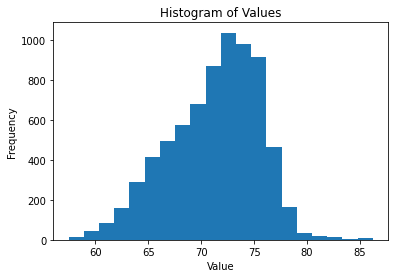

In [41]:
import matplotlib.pyplot as plt

values = df_temp.select('value').rdd.flatMap(lambda x: x).collect()

plt.hist(values, bins=20)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df_temp.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 05:00:00| 70.06097|   5|  4|    7|2013|          5|           weekday|           nighttime|
|2013-07-04 06:00:00| 69.27976|   6|  4|    7|2013|          5| 

+---------+----+---+-----+----+-----------+------------------+--------------------+------------------------+--------------------------+--------------------------+----------------------------+
|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|weekday_or_weekend_index|daytime_or_nighttime_index|weekday_or_weekend_encoded|daytime_or_nighttime_encoded|
+---------+----+---+-----+----+-----------+------------------+--------------------+------------------------+--------------------------+--------------------------+----------------------------+
| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|                     0.0|                       1.0|             (1,[0],[1.0])|                   (1,[],[])|
| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|                     0.0|                       1.0|             (1,[0],[1.0])|                   (1,[],[])|
| 70.87781|   2|  4|    7|2013|         

+---------+----+---+-----+----+-----------+------------------+--------------------+------------------------+--------------------------+--------------------------+----------------------------+--------------------+--------------------+
|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|weekday_or_weekend_index|daytime_or_nighttime_index|weekday_or_weekend_encoded|daytime_or_nighttime_encoded|            features|      scaledFeatures|
+---------+----+---+-----+----+-----------+------------------+--------------------+------------------------+--------------------------+--------------------------+----------------------------+--------------------+--------------------+
| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|                     0.0|                       1.0|             (1,[0],[1.0])|                   (1,[],[])|[69.8808364868164...|[16.4521910998663...|
| 71.22023|   1|  4|    7|2013|          5|           weekday|  

In [ ]:
train = scaled_df.filter(col("timestamp") < "2014-09-01 00:00:00")
test = scaled_df.filter(col("timestamp") >= "2014-09-01 00:00:00")

In [73]:
from pyspark.sql.functions import from_unixtime, date_format, unix_timestamp
df_temp = df_temp.withColumn("date", date_format("timestamp", "yyyy-MM-dd"))


In [43]:
df_temp.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 05:00:00| 70.06097|   5|  4|    7|2013|          5|           weekda

In [ ]:
from pyspark.sql.functions import col
df_temp = df_temp.withColumn('value', col('value').cast('float'))
daily_temps = df_temp.groupBy("date").avg("value").orderBy('date')


In [ ]:
daily_temps.show()

+----------+-----------------+
|      date|       avg(value)|
+----------+-----------------+
|2013-07-04|70.47084712982178|
|2013-07-05|71.35260740915935|
|2013-07-06|68.72037506103516|
|2013-07-07|64.70680809020996|
|2013-07-08|66.31683317820232|
|2013-07-09|68.80214722951253|
|2013-07-10|69.20755004882812|
|2013-07-11|69.98803393046062|
|2013-07-12|70.90653991699219|
|2013-07-13|69.61227544148763|
|2013-07-14|66.77841663360596|
|2013-07-15|69.09519735972087|
|2013-07-16|71.34799448649089|
|2013-07-17|71.60272280375163|
|2013-07-18| 72.5618127187093|
|2013-07-19|73.70883464813232|
|2013-07-20|71.11485354105632|
|2013-07-21|66.43986225128174|
|2013-07-22|68.20051368077596|
|2013-07-23|69.92810185750325|
+----------+-----------------+
only showing top 20 rows



In [ ]:
df_temp.show()

+-------------------+---------+----------+
|          timestamp|    value|      date|
+-------------------+---------+----------+
|2013-07-04 00:00:00| 69.88084|2013-07-04|
|2013-07-04 01:00:00| 71.22023|2013-07-04|
|2013-07-04 02:00:00| 70.87781|2013-07-04|
|2013-07-04 03:00:00|  68.9594|2013-07-04|
|2013-07-04 04:00:00|69.283554|2013-07-04|
|2013-07-04 05:00:00| 70.06097|2013-07-04|
|2013-07-04 06:00:00| 69.27976|2013-07-04|
|2013-07-04 07:00:00|69.369606|2013-07-04|
|2013-07-04 08:00:00| 69.16672|2013-07-04|
|2013-07-04 09:00:00|68.986084|2013-07-04|
|2013-07-04 10:00:00|69.965065|2013-07-04|
|2013-07-04 11:00:00|  70.5562|2013-07-04|
|2013-07-04 12:00:00|  70.3075|2013-07-04|
|2013-07-04 13:00:00|70.246254|2013-07-04|
|2013-07-04 14:00:00| 69.85491|2013-07-04|
|2013-07-04 15:00:00| 71.64329|2013-07-04|
|2013-07-04 16:00:00| 71.24566|2013-07-04|
|2013-07-04 17:00:00|  70.7451|2013-07-04|
|2013-07-04 18:00:00|  71.3733|2013-07-04|
|2013-07-04 19:00:00| 71.79575|2013-07-04|
+----------

In [44]:
max_temp = df_temp.agg({'value':'max'}).collect()[0][0]
print("Maximum temperature: {}".format(max_temp))


Maximum temperature: 86.22321319580078


In [45]:
min_temp = df_temp.agg({'value':'min'}).collect()[0][0]
print("Minimum temperature: {}".format(min_temp))


Minimum temperature: 57.458404541015625


In [46]:
temp_range = max_temp - min_temp

In [47]:
temp_stddev = df_temp.agg({'value':'stddev'}).collect()[0][0]
print('temp stddev: {}'.format(temp_stddev))

temp stddev: 4.247509408481414


In [48]:
from pyspark.sql.functions import skewness
from pyspark.sql.types import FloatType


skewness_value = df_temp.select(skewness("value")).collect()[0][0]


In [49]:
print(skewness_value)

-0.3925324581781906


slightly more values lowers than the mean.

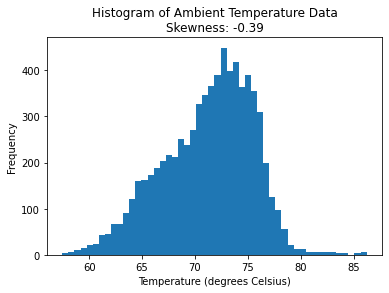

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df_temp.select('value').rdd.flatMap(lambda x: x).collect(), bins=50)
ax.set_xlabel('Temperature (degrees Celsius)')
ax.set_ylabel('Frequency')
ax.set_title(f'Histogram of Ambient Temperature Data\nSkewness: {skewness_value:.2f}')
plt.show()

In [51]:
import pyspark.sql.functions as F
kurtosis = df_temp.agg(F.kurtosis('value')).collect()[0][0]


In [52]:
print(kurtosis)

-0.12128662822123104


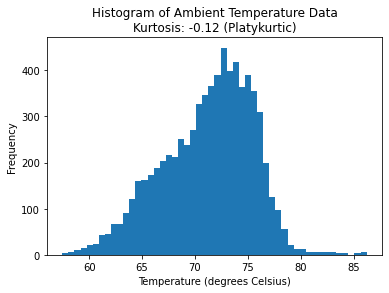

In [53]:

# Plot a histogram of the data
fig, ax = plt.subplots()
ax.hist(df_temp.select('value').rdd.flatMap(lambda x: x).collect(), bins=50)
ax.set_xlabel('Temperature (degrees Celsius)')
ax.set_ylabel('Frequency')
ax.set_title(f'Histogram of Ambient Temperature Data\nKurtosis: {kurtosis:.2f} (Platykurtic)')
plt.show()

In [74]:
weekly_mean = df_temp.groupby('week').agg(avg('temperature'))

AnalysisException: ignored

In [ ]:
df_temp.show()

+-------------------+---------+----------+
|          timestamp|    value|      date|
+-------------------+---------+----------+
|2013-07-04 00:00:00| 69.88084|2013-07-04|
|2013-07-04 01:00:00| 71.22023|2013-07-04|
|2013-07-04 02:00:00| 70.87781|2013-07-04|
|2013-07-04 03:00:00|  68.9594|2013-07-04|
|2013-07-04 04:00:00|69.283554|2013-07-04|
|2013-07-04 05:00:00| 70.06097|2013-07-04|
|2013-07-04 06:00:00| 69.27976|2013-07-04|
|2013-07-04 07:00:00|69.369606|2013-07-04|
|2013-07-04 08:00:00| 69.16672|2013-07-04|
|2013-07-04 09:00:00|68.986084|2013-07-04|
|2013-07-04 10:00:00|69.965065|2013-07-04|
|2013-07-04 11:00:00|  70.5562|2013-07-04|
|2013-07-04 12:00:00|  70.3075|2013-07-04|
|2013-07-04 13:00:00|70.246254|2013-07-04|
|2013-07-04 14:00:00| 69.85491|2013-07-04|
|2013-07-04 15:00:00| 71.64329|2013-07-04|
|2013-07-04 16:00:00| 71.24566|2013-07-04|
|2013-07-04 17:00:00|  70.7451|2013-07-04|
|2013-07-04 18:00:00|  71.3733|2013-07-04|
|2013-07-04 19:00:00| 71.79575|2013-07-04|
+----------

In [75]:
from pyspark.sql.functions import weekofyear

df_temp = df_temp.withColumn('week', weekofyear('timestamp'))


In [76]:
df_temp.show()

+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|      value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-07-04 00:00:00|69.88083514|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 01:00:00|71.22022706|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 02:00:00|70.87780496|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 03:00:00|68.95939994|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 04:00:00|69.28355102|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 05:00:00|70.

In [ ]:
from pyspark.sql.functions import avg
weekly_mean = df_temp.groupBy('week').agg(avg('value')).orderBy('week')


In [ ]:
weekly_mean.show()

+----+-----------------+
|week|       avg(value)|
+----+-----------------+
|   1| 75.6577277410598|
|   2|75.26051684788295|
|   3|75.06641397022065|
|   4|73.32458023797898|
|   5|71.72356010618664|
|   6| 72.6094315846761|
|   7|71.32547310420445|
|   8|70.44444629124233|
|   9| 71.5588383030247|
|  10|66.91585922241211|
|  11|68.25382661819458|
|  12|67.59528856392366|
|  13|67.96702855593199|
|  14|68.13654755383003|
|  15| 64.0205763357657|
|  16|65.77348886217389|
|  17|67.00948474520729|
|  18|65.25208386920747|
|  19|66.38945654460362|
|  20|66.45565141950335|
+----+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import stddev, max, min

weekly_stddev = df_temp.groupBy('week').agg(stddev('value')).orderBy('week')


In [ ]:
weekly_stddev.show()

+----+------------------+
|week|stddev_samp(value)|
+----+------------------+
|   1|1.4736922133242254|
|   2| 1.524349421209301|
|   3| 1.810258144018254|
|   4| 1.632211629041752|
|   5| 1.521452744006231|
|   6|1.4467009517151084|
|   7|2.6054334123517884|
|   8|2.0800125827234877|
|   9| 2.591973062069365|
|  10|2.6430707077400624|
|  11| 2.691817635010105|
|  12|3.0405630139875104|
|  13|2.5282586035788404|
|  14|  2.55566351743775|
|  15| 4.031756790339654|
|  16| 3.313518761592206|
|  17| 2.720392089273927|
|  18|1.7207826958629557|
|  19|2.8378375592300755|
|  20|3.5319381483079253|
+----+------------------+
only showing top 20 rows



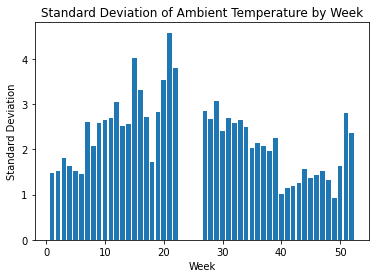

In [ ]:
import matplotlib.pyplot as plt

# Extract the week and standard deviation values as separate lists
weeks = [row['week'] for row in weekly_stddev.collect()]
std_devs = [row['stddev_samp(value)'] for row in weekly_stddev.collect()]

# Create the bar chart
plt.bar(weeks, std_devs)
plt.xlabel('Week')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Ambient Temperature by Week')
plt.show()


In [77]:
df = df_temp

In [78]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [ ]:
assembler = VectorAssembler(inputCols = ['date'], outputCol = 'features')

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='temperature')
df_temp = lr.fit(assembler.transform(df_temp)).coefficients[0]

IllegalArgumentException: ignored

In [ ]:
weekly_mean.show()

+----+-----------------+
|week|       avg(value)|
+----+-----------------+
|   1| 75.6577277410598|
|   2|75.26051684788295|
|   3|75.06641397022065|
|   4|73.32458023797898|
|   5|71.72356010618664|
|   6| 72.6094315846761|
|   7|71.32547310420445|
|   8|70.44444629124233|
|   9| 71.5588383030247|
|  10|66.91585922241211|
|  11|68.25382661819458|
|  12|67.59528856392366|
|  13|67.96702855593199|
|  14|68.13654755383003|
|  15| 64.0205763357657|
|  16|65.77348886217389|
|  17|67.00948474520729|
|  18|65.25208386920747|
|  19|66.38945654460362|
|  20|66.45565141950335|
+----+-----------------+
only showing top 20 rows



In [79]:
daily_mean = df_temp.groupBy('date').agg(avg('value')).orderBy('date')


In [80]:
df_temp.show()

+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|      value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-07-04 00:00:00|69.88083514|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 01:00:00|71.22022706|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 02:00:00|70.87780496|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 03:00:00|68.95939994|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 04:00:00|69.28355102|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 05:00:00|70.

In [81]:
daily_mean = weekly_mean.withColumn('year', year('date')) \
                 .withColumn('month', month('date')) \
                 .withColumn('day', dayofmonth('date'))

NameError: ignored

In [ ]:
assembler = VectorAssembler(inputCols=['year', 'month', 'day'], outputCol='features')


In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='avg(value)')

In [ ]:
daily_lr = lr.fit(assembler.transform(daily_mean)).coefficients[0]

In [ ]:
weekly_assembler = VectorAssembler(inputCols=['week'], outputCol='features')
weekly_lr = LinearRegression(featuresCol='features', labelCol='avg(value)')
weekly_lr_model = weekly_lr.fit(weekly_assembler.transform(weekly_mean.groupBy('week').agg(avg('avg(value)').alias('avg(value)')).withColumnRenamed('week', 'week')))

In [ ]:
slope = weekly_lr_model.coefficients[0]

In [ ]:
df_temp.show()
weekly_mean = weekly_mean.withColumn('date', df_temp.date)

+-------------------+---------+----------+----+
|          timestamp|    value|      date|week|
+-------------------+---------+----------+----+
|2013-07-04 00:00:00| 69.88084|2013-07-04|  27|
|2013-07-04 01:00:00| 71.22023|2013-07-04|  27|
|2013-07-04 02:00:00| 70.87781|2013-07-04|  27|
|2013-07-04 03:00:00|  68.9594|2013-07-04|  27|
|2013-07-04 04:00:00|69.283554|2013-07-04|  27|
|2013-07-04 05:00:00| 70.06097|2013-07-04|  27|
|2013-07-04 06:00:00| 69.27976|2013-07-04|  27|
|2013-07-04 07:00:00|69.369606|2013-07-04|  27|
|2013-07-04 08:00:00| 69.16672|2013-07-04|  27|
|2013-07-04 09:00:00|68.986084|2013-07-04|  27|
|2013-07-04 10:00:00|69.965065|2013-07-04|  27|
|2013-07-04 11:00:00|  70.5562|2013-07-04|  27|
|2013-07-04 12:00:00|  70.3075|2013-07-04|  27|
|2013-07-04 13:00:00|70.246254|2013-07-04|  27|
|2013-07-04 14:00:00| 69.85491|2013-07-04|  27|
|2013-07-04 15:00:00| 71.64329|2013-07-04|  27|
|2013-07-04 16:00:00| 71.24566|2013-07-04|  27|
|2013-07-04 17:00:00|  70.7451|2013-07-0

AnalysisException: ignored

In [ ]:
weekly_mean.show()

+----+-----------------+
|week|       avg(value)|
+----+-----------------+
|   1| 75.6577277410598|
|   2|75.26051684788295|
|   3|75.06641397022065|
|   4|73.32458023797898|
|   5|71.72356010618664|
|   6| 72.6094315846761|
|   7|71.32547310420445|
|   8|70.44444629124233|
|   9| 71.5588383030247|
|  10|66.91585922241211|
|  11|68.25382661819458|
|  12|67.59528856392366|
|  13|67.96702855593199|
|  14|68.13654755383003|
|  15| 64.0205763357657|
|  16|65.77348886217389|
|  17|67.00948474520729|
|  18|65.25208386920747|
|  19|66.38945654460362|
|  20|66.45565141950335|
+----+-----------------+
only showing top 20 rows



AnalysisException: ignored

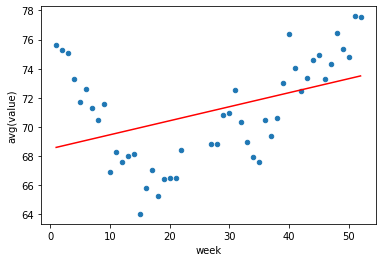

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_pd = weekly_mean.toPandas()
data_pd.plot(x="week", y="avg(value)", kind="scatter")
plt.plot(data_pd["week"], data_pd["week"] * slope + weekly_lr_model.intercept, color="red")
plt.show()

In [ ]:
weekly_mean.show()

+----+-----------------+
|week|       avg(value)|
+----+-----------------+
|   1| 75.6577277410598|
|   2|75.26051684788295|
|   3|75.06641397022065|
|   4|73.32458023797898|
|   5|71.72356010618664|
|   6| 72.6094315846761|
|   7|71.32547310420445|
|   8|70.44444629124233|
|   9| 71.5588383030247|
|  10|66.91585922241211|
|  11|68.25382661819458|
|  12|67.59528856392366|
|  13|67.96702855593199|
|  14|68.13654755383003|
|  15| 64.0205763357657|
|  16|65.77348886217389|
|  17|67.00948474520729|
|  18|65.25208386920747|
|  19|66.38945654460362|
|  20|66.45565141950335|
+----+-----------------+
only showing top 20 rows



In [ ]:
#spectral density

In [65]:
df_temp.show()

+-------+
|Celsius|
+-------+
|   21.0|
|   21.8|
|   21.6|
|   20.5|
|   20.7|
|   21.1|
|   20.7|
|   20.8|
|   20.6|
|   20.5|
|   21.1|
|   21.4|
|   21.3|
|   21.2|
|   21.0|
|   22.0|
|   21.8|
|   21.5|
|   21.9|
|   22.1|
+-------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
import numpy as np
from pyspark.ml.feature import PCA

# Convert DataFrame into an RDD and extract the value column as a list of floats
value_list = df_temp.select("value").rdd.flatMap(lambda x: x).collect()

# Apply the Fast Fourier Transform (FFT) algorithm on the value list to calculate the power spectrum
fft_output = np.fft.fft(value_list)
power_spectrum = np.abs(fft_output) ** 2

# Define the sampling frequency and calculate the frequency axis
sampling_freq = 1.0 / 3600  # Data is hourly
freq_axis = np.fft.fftfreq(len(value_list), d=sampling_freq)
freq_axis = freq_axis[:len(freq_axis) // 2]

# Calculate the spectral density using the power spectrum
spectral_density = power_spectrum[:len(power_spectrum) // 2] / (sampling_freq * len(value_list))

# Convert the frequency axis and spectral density into a PySpark DataFrame
freq_axis_df = spark.createDataFrame([(float(f),) for f in freq_axis], ["frequency"])
spectral_density_df = spark.createDataFrame([(float(s),) for s in spectral_density], ["spectral_density"])

# Join the two DataFrames and display the results
result_df = freq_axis_df.join(spectral_density_df, freq_axis_df.frequency == spectral_density_df.spectral_density, "left_outer")
result_df.show()


+-----------------+----------------+
|        frequency|spectral_density|
+-----------------+----------------+
|              0.0|            null|
| 4.95390119719279|            null|
|7.430851795789184|            null|
|0.990780239438558|            null|
|8.917022154947022|            null|
|2.476950598596395|            null|
|4.458511077473511|            null|
|3.467730838034953|            null|
|8.421632035227743|            null|
|3.963120957754232|            null|
|6.935461676069906|            null|
| 9.90780239438558|            null|
|1.981560478877116|            null|
|6.440071556350627|            null|
|0.495390119719279|            null|
|5.449291316912069|            null|
|  9.4124122746663|            null|
|7.926241915508464|            null|
|2.972340718315674|            null|
|5.944681436631348|            null|
+-----------------+----------------+
only showing top 20 rows



In [ ]:
print(freq_axis_df.select('frequency').distinct().count())
print(spectral_density_df.select('spectral_density').distinct().count())


3633
3633


In [ ]:
spectral_density_df = spectral_density_df.fillna(0, subset=['spectral_density'])


In [ ]:

# Join the two DataFrames and display the results
result_df = freq_axis_df.join(spectral_density_df, freq_axis_df.frequency == spectral_density_df.spectral_density, "left")
result_df.show()

+-----------------+----------------+
|        frequency|spectral_density|
+-----------------+----------------+
|              0.0|            null|
| 4.95390119719279|            null|
|7.430851795789184|            null|
|0.990780239438558|            null|
|8.917022154947022|            null|
|2.476950598596395|            null|
|4.458511077473511|            null|
|3.467730838034953|            null|
|8.421632035227743|            null|
|3.963120957754232|            null|
|6.935461676069906|            null|
| 9.90780239438558|            null|
|1.981560478877116|            null|
|6.440071556350627|            null|
|0.495390119719279|            null|
|5.449291316912069|            null|
|  9.4124122746663|            null|
|7.926241915508464|            null|
|2.972340718315674|            null|
|5.944681436631348|            null|
+-----------------+----------------+
only showing top 20 rows



In [55]:
from pyspark.sql.functions import round

df_temp = df_temp.withColumn("Celsius", (col("value")-32)*(5/9))
df_temp = df_temp.select(round(df_temp['Celsius'], 1).alias('Celsius'))
# compute the frequency distribution of temperature
freq_df = df_temp.groupBy("Celsius").count().orderBy("Celsius")

# show the resulting dataframe
freq_df.show()

+-------+-----+
|Celsius|count|
+-------+-----+
|   14.1|    1|
|   14.4|    2|
|   14.5|    1|
|   14.6|    1|
|   14.7|    3|
|   14.8|    1|
|   14.9|    4|
|   15.0|    2|
|   15.1|    6|
|   15.2|    5|
|   15.3|    5|
|   15.4|    3|
|   15.5|    6|
|   15.6|    1|
|   15.7|   14|
|   15.8|    9|
|   15.9|    6|
|   16.0|    8|
|   16.1|   13|
|   16.2|   11|
+-------+-----+
only showing top 20 rows



In [58]:
freq_df.count()

151

In [59]:
pd_df = freq_df.toPandas()

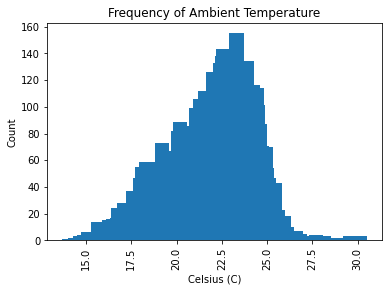

In [61]:
plt.bar(pd_df['Celsius'],pd_df['count'],align = 'center')
plt.xticks(rotation=90)
plt.xlabel("Celsius (C)")
plt.ylabel("Count")
plt.title("Frequency of Ambient Temperature")
plt.show()

In [57]:
df = df_temp

In [ ]:
df.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|
|2013-07-04 05:00:00| 70.06097|   5|  4|    7|2013|          5|           weekda

In [62]:
from pyspark.sql.functions import mean, stddev
from pyspark.sql.window import Window
import pyspark.sql.functions as F


In [82]:
df.show()

+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|      value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-07-04 00:00:00|69.88083514|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 01:00:00|71.22022706|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 02:00:00|70.87780496|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 03:00:00|68.95939994|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 04:00:00|69.28355102|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 05:00:00|70.

In [83]:
mean_temp = df.agg(mean('value')).collect()[0][0]
stddev_temp = df.agg(stddev('value')).collect()[0][0]


In [84]:
threshold = mean_temp + 3 * stddev_temp


In [85]:
df = df.withColumn('is_anomaly', F.when(F.col('value') > threshold, 1).otherwise(0))


In [86]:
anomalies = df.filter(F.col('is_anomaly') == 1)


In [87]:
anomalies.show()

+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+----------+
|          timestamp|      value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|is_anomaly|
+-------------------+-----------+----+---+-----+----+-----------+------------------+--------------------+----------+----+----------+
|2013-12-22 17:00:00|84.39093203|  17| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|         1|
|2013-12-22 18:00:00|85.22768546|  18| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|         1|
|2013-12-22 19:00:00|86.09488844|  19| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|         1|
|2013-12-22 20:00:00|86.20418922|  20| 22|   12|2013|          1|           weekend|           nighttime|2013-12-22|  51|         1|
|2013-12-22 21:00:00|86.22321261|  21| 22|   12|2013|          1|    

In [183]:
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType

# Define a PySpark UDF from the mad_based_outlier function
@udf(returnType=BooleanType())
def mad_outlier_udf(col, thresh=3.5):
    arr = np.array(col)
    if len(arr.shape) == 1:
        arr = arr[:, None]
    median = np.median(arr, axis=0)
    diff = np.sum((arr - median) ** 2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Apply the UDF to a PySpark DataFrame column
df = df.withColumn('mad_outlier', mad_outlier_udf(df['value']))


In [123]:
import numpy as np

arr = np.array(df.select(col('value')).rdd.flatMap(lambda x: x).collect())


In [129]:
arr

array([69.88083649, 71.2202301 , 70.87780762, ..., 72.04656219,
       71.82522583, 72.58409119])

In [137]:
from pyspark.sql.types import ArrayType, DoubleType
Mad_data = mad_based_outlier(arr)

<class 'numpy.ndarray'>


AttributeError: ignored

TypeError: ignored

TypeError: ignored

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 05:00:00| 70.06097|   5|  4|

<class 'numpy.ndarray'>


array([False, False, False, ..., False, False, False])

In [94]:
df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- value: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- weekday_or_weekend: string (nullable = false)
 |-- daytime_or_nighttime: string (nullable = false)
 |-- date: string (nullable = true)
 |-- week: integer (nullable = true)
 |-- is_anomaly: integer (nullable = false)



In [95]:
df_temp = df_temp.withColumn("value", col("value").cast(FloatType()))
df = df.withColumn('value', col('value').cast(FloatType()))

In [133]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import BooleanType



AttributeError: ignored

In [178]:
df = df.filter(col('value').isNotNull())

In [189]:
df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- value: float (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- weekday_or_weekend: string (nullable = false)
 |-- daytime_or_nighttime: string (nullable = false)
 |-- date: string (nullable = true)
 |-- week: integer (nullable = true)



In [187]:
def mad_outlier_udf(col):
    # Convert the PySpark column to a NumPy array
    arr = np.array(col)
    # Call the mad_based_outlier function on the array
    result = mad_based_outlier(arr)
    # Convert the NumPy boolean array to a Python list
    result_list = result.tolist()
    # Return the result as a PySpark Boolean column
    return result_list

# Apply the UDF on a PySpark DataFrame column
df = df.withColumn('mad_outlier', mad_outlier_udf(df['value']))

<class 'numpy.ndarray'>


AxisError: ignored

In [163]:
df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- value: float (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- weekday_or_weekend: string (nullable = false)
 |-- daytime_or_nighttime: string (nullable = false)
 |-- date: string (nullable = true)
 |-- week: integer (nullable = true)



+---------+-----+----+----+-----+----+-----------+------------------+--------------------+----+----+
|timestamp|value|hour| day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|date|week|
+---------+-----+----+----+-----+----+-----------+------------------+--------------------+----+----+
|     7267| 7267|7267|7267| 7267|7267|       7267|              7267|                7267|7267|7267|
+---------+-----+----+----+-----+----+-----------+------------------+--------------------+----+----+



In [175]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---------+-----+----+---+-----+----+-----------+------------------+--------------------+----+----+
|timestamp|value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|date|week|
+---------+-----+----+---+-----+----+-----------+------------------+--------------------+----+----+
|        0|    0|   0|  0|    0|   0|          0|                 0|                   0|   0|   0|
+---------+-----+----+---+-----+----+-----------+------------------+--------------------+----+----+



Unsupervised methods:
Unsupervised methods don't require labeled data and work by identifying data points that are significantly different from the rest of the data. Some examples of unsupervised methods for anomaly detection include clustering-based methods (e.g., k-means, DBSCAN), density-based methods (e.g., local outlier factor, one-class SVM), and reconstruction-based methods (e.g., autoencoder, PCA).

Supervised methods:
Supervised methods require labeled data and work by learning a model that can distinguish between normal and anomalous data. Some examples of supervised methods for anomaly detection include classification-based methods (e.g., SVM, decision tree, random forest) and regression-based methods (e.g., linear regression, logistic regression).

Hybrid methods:
Hybrid methods combine unsupervised and supervised methods to leverage the strengths of both approaches. For example, one could use an unsupervised method to identify potential anomalies and then use a supervised method to refine the results.

In [190]:
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType
import numpy as np

def iqr_outlier(points, multiplier=1.5):
    q1, q3 = np.percentile(points, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return (points < lower_bound) | (points > upper_bound)

iqr_outlier_udf = udf(lambda col: iqr_outlier(np.array(col)), BooleanType())

# Apply the UDF on a PySpark DataFrame column
df = df.withColumn('iqr_outlier', iqr_outlier_udf(df['value']))

In [191]:
df.show()

Py4JJavaError: ignored

In [192]:
df = df_temp

Statistical methods such as z-score, median absolute deviation (MAD), and interquartile range (IQR) which can detect anomalies based on deviations from the normal statistical properties of the data.
Density-based methods such as Local Outlier Factor (LOF) and DBSCAN that identify anomalies as data points that are in low-density regions of the data space.
Clustering-based methods such as k-means clustering that identify anomalies as data points that do not belong to any cluster or belong to a cluster with significantly different properties than the majority of the data.

In [193]:
df.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|
|2013-07-04 05:00:00| 70.06097|   5|  4|

In [198]:


# Calculate the lower and upper quartiles and IQR
quantiles = df.approxQuantile("value", [0.25, 0.75], 0.01)
q1 = quantiles[0]
q3 = quantiles[1]
iqr = q3 - q1

# Define the lower and upper bounds for identifying potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify potential outliers
outliers_df = df.filter((df["value"] < lower_bound) | (df["value"] > upper_bound))

# Show the potential outliers
outliers_df.show()


+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+
|2013-12-22 01:00:00|   83.781|   1| 22|   12|2013|          1|           weekend|           nighttime|2013-12-22|  51|
|2013-12-22 16:00:00| 83.51163|  16| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|
|2013-12-22 17:00:00| 84.39093|  17| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|
|2013-12-22 18:00:00|85.227684|  18| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|
|2013-12-22 19:00:00| 86.09489|  19| 22|   12|2013|          1|           weekend|             daytime|2013-12-22|  51|
|2013-12-22 20:00:00|86.204185|  20| 22|

In [197]:
print(pyspark.__version__)


3.3.2


In [204]:
from pyspark.sql.functions import col

df = df.withColumn('IQR', ((col('value') >= lower_bound) & (col('value') <= upper_bound)).cast('integer'))


In [205]:
df.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|IQR|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07

In [207]:
df_iqr_anomaly = df.filter(col('IQR') == 0)

In [209]:
data = df
assembler = VectorAssembler(inputCols=, outputCol="features")
data = assembler.transform(data)

IllegalArgumentException: ignored

In [211]:
df = df.withColumn('hour', hour('timestamp'))

In [212]:
df.show()

+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
|          timestamp|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|IQR|
+-------------------+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
|2013-07-04 00:00:00| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 01:00:00| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 02:00:00| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 03:00:00|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07-04 04:00:00|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|2013-07

In [213]:
df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- value: float (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- weekday_or_weekend: string (nullable = false)
 |-- daytime_or_nighttime: string (nullable = false)
 |-- date: string (nullable = true)
 |-- week: integer (nullable = true)
 |-- IQR: integer (nullable = true)



In [214]:
df = df.drop('timestamp')

In [215]:
df.show()

+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
|    value|hour|day|month|year|day_of_week|weekday_or_weekend|daytime_or_nighttime|      date|week|IQR|
+---------+----+---+-----+----+-----------+------------------+--------------------+----------+----+---+
| 69.88084|   0|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
| 71.22023|   1|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
| 70.87781|   2|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|  68.9594|   3|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
|69.283554|   4|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
| 70.06097|   5|  4|    7|2013|          5|           weekday|           nighttime|2013-07-04|  27|  1|
| 69.27976|   6|  4|    7|2013|          5|           weekday|  

In [223]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

# create StringIndexer for the two categorical columns
weekday_indexer = StringIndexer(inputCol="weekday_or_weekend", outputCol="weekday_index")
daytime_indexer = StringIndexer(inputCol="daytime_or_nighttime", outputCol="daytime_index")

# fit the StringIndexers to the data
indexed = weekday_indexer.fit(df).transform(df)
indexed = daytime_indexer.fit(indexed).transform(indexed)

# create OneHotEncoder for the two indexed columns
encoder = OneHotEncoder(inputCols=["weekday_index", "daytime_index"], outputCols=["weekday_vec", "daytime_vec"])

# fit the encoder to the data
encoded = encoder.fit(indexed).transform(indexed)

# select the encoded vectors and drop the original categorical columns and the indexers
encoded = encoded.select("value", "hour", "day", "month", "year", "date", "week", "IQR", "weekday_vec", "daytime_vec")


In [237]:
scaled_df = 0

In [238]:
encoded.show()

+---------+----+---+-----+----+----------+----+---+-------------+-------------+--------------------+
|    value|hour|day|month|year|      date|week|IQR|  weekday_vec|  daytime_vec|            features|
+---------+----+---+-----+----+----------+----+---+-------------+-------------+--------------------+
| 69.88084|   0|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[0.0,4.0,7.0,2013...|
| 71.22023|   1|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[1.0,4.0,7.0,2013...|
| 70.87781|   2|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[2.0,4.0,7.0,2013...|
|  68.9594|   3|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[3.0,4.0,7.0,2013...|
|69.283554|   4|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[4.0,4.0,7.0,2013...|
| 70.06097|   5|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[5.0,4.0,7.0,2013...|
| 69.27976|   6|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[6.0,4.0,7.0

In [239]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

# Vector Assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["hour", "day", "month", "year", "day", "weekday_vec",
                                       "daytime_vec", "week", "IQR"], outputCol="features")

# Apply vector assembler to your data
encoded = assembler.transform(encoded)

# Initialize StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Fit the scaler to the data and transform the data
scaled_df = scaler.fit(encoded).transform(encoded)


IllegalArgumentException: ignored

In [246]:
scaled_df = scaler.fit(encoded).transform(encoded)


In [247]:
scaled_df.show()

+---------+----+---+-----+----+----------+----+---+-------------+-------------+--------------------+---------------------+
|    value|hour|day|month|year|      date|week|IQR|  weekday_vec|  daytime_vec|            features|scaled_features_value|
+---------+----+---+-----+----+----------+----+---+-------------+-------------+--------------------+---------------------+
| 69.88084|   0|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[0.0,4.0,7.0,2013...| [0.0,0.4635782663...|
| 71.22023|   1|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[1.0,4.0,7.0,2013...| [0.14435492666394...|
| 70.87781|   2|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[2.0,4.0,7.0,2013...| [0.28870985332788...|
|  68.9594|   3|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[3.0,4.0,7.0,2013...| [0.43306477999182...|
|69.283554|   4|  4|    7|2013|2013-07-04|  27|  1|(1,[0],[1.0])|    (1,[],[])|[4.0,4.0,7.0,2013...| [0.57741970665576...|
| 70.06097|   5|

In [242]:
scaled_df.drop('date')

DataFrame[value: float, hour: int, day: int, month: int, year: int, week: int, IQR: int, weekday_vec: vector, daytime_vec: vector, features: vector, scaled_features_value: vector]

In [249]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.8-py3-none-any.whl size=184055 sha256=5aebd3f374e43ffa5d2d2f0d9841ef52f16298a170252884ac4e82a16d20bf9c
  Stored in directory: /root/.cache/pip/wheels/90/2b/16/c9baeb5fcd94a8a5bc4ea786fef2122f5b9ab3a61a7fc0303a
Successfully built pyod


In [250]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import expr
from pyspark.sql.functions import col
from pyod.models.lof import LOF


In [229]:
from sklearn.neighbors import LocalOutlierFactor

# Instantiate LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Fit the model and get the predictions
preds = lof.fit_predict(df_scaled[['value']])

NameError: ignored

In [255]:
kmeans = KMeans(k=10, seed=1)
model = kmeans.fit(scaled_df)
scaled_df = model.transform(scaled_df).withColumn('cluster', expr('CAST(prediction AS INT)'))


In [256]:
lof = LOF(contamination=0.1)
lof.fit(df.select('cluster', 'features').rdd.map(lambda x: (x[1], x[0])))


ValueError: ignored